In [252]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, log_loss

# 1. Loading data

In [96]:
# load data
df = pd.read_csv('Loan.csv')

In [97]:
# get overview of data
print(df.shape)
df.head()

(1006, 14)


,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
0,No Data,critical,Learning / Edu purposes,2116.0,0-200,5-7 Years,Male,No,Property - Real Estate,47.0,House Owner,Services,No,No
1,No Data,critical,TV,2438.0,No Data,7+ Years,Male,No,Savings Account,52.0,House Owner,Skilled Labor,No,No
2,No Data,critical,Buying a New Car,2144.0,0-200,2-5 Years,Male,No,Vehicle,48.0,House Owner,Skilled Labor,No,No
3,No Data,critical,Home furniture,2073.0,No Data,2-5 Years,Married,No,Vehicle,25.0,House Owner,Skilled Labor,Yes,No
4,No Data,critical,Support for Business,1276.0,No Data,7+ Years,Male,No,No Security,59.0,Renting,Services,No,No


# 2. Processing data

In [98]:
# check for null values
df.isnull().sum()

Type of Account          2
Account History          2
Reason for the Loan      3
Loan Amount              3
Account Savings          4
Employment History       5
Individual Stauts        5
Other Loans              5
Security / Collateral    5
Age                      4
Residence Status         4
Job                      4
Completed Other loan?    4
Good Loan                5
dtype: int64

In [99]:
# check null values for employment history
df[df['Individual Stauts'].isnull()]

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
686,Type C,Good,Buying a New Car,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
721,Type C,critical,Home furniture,5387.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737,Type C,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,House Owner,Services,No,NaN
1005,NaN,NaN,NaN,1765.0,0-201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
# delete null values
df=df.dropna(subset=['Employment History'])

In [101]:
df.isnull().sum()

Type of Account          0
Account History          0
Reason for the Loan      0
Loan Amount              0
Account Savings          0
Employment History       0
Individual Stauts        0
Other Loans              0
Security / Collateral    0
Age                      0
Residence Status         0
Job                      0
Completed Other loan?    0
Good Loan                0
dtype: int64

In [102]:
# investigate elements in each feature
for column in df:
    unique_value = np.unique(df[column])
    no = len(unique_value)
    if no<10:
        print(no,unique_value)

4 ['No Data' 'Type A' 'Type B' 'Type C']
3 ['Average (known delays)' 'Good' 'critical']
5 ['0-200' '1000+' '200-500' '500-1000' 'No Data']
5 ['0-2 Years' '2-5 Years' '5-7 Years' '7+ Years' 'Unemployed']
5 ['Divorced' 'Female' 'Female_' 'Male' 'Married']
2 ['No' 'Yes']
4 ['No Security' 'Property - Real Estate' 'Savings Account' 'Vehicle']
3 ['Free' 'House Owner' 'Renting']
4 ['Not Employed' 'Professional / Management' 'Services' 'Skilled Labor']
2 ['No' 'Yes']
2 ['No' 'Yes']


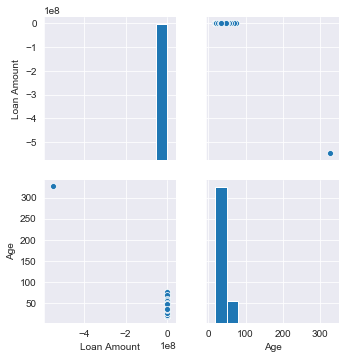

In [103]:
df.head()
g = sns.pairplot(data=df,palette='Set3')

In [104]:
df.head()

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
0,No Data,critical,Learning / Edu purposes,2116.0,0-200,5-7 Years,Male,No,Property - Real Estate,47.0,House Owner,Services,No,No
1,No Data,critical,TV,2438.0,No Data,7+ Years,Male,No,Savings Account,52.0,House Owner,Skilled Labor,No,No
2,No Data,critical,Buying a New Car,2144.0,0-200,2-5 Years,Male,No,Vehicle,48.0,House Owner,Skilled Labor,No,No
3,No Data,critical,Home furniture,2073.0,No Data,2-5 Years,Married,No,Vehicle,25.0,House Owner,Skilled Labor,Yes,No
4,No Data,critical,Support for Business,1276.0,No Data,7+ Years,Male,No,No Security,59.0,Renting,Services,No,No


# 3. Data cleaning

In [105]:
# deleting outliers
df = df[df['Age']<100]

In [106]:
df[df['Loan Amount']<0]

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan


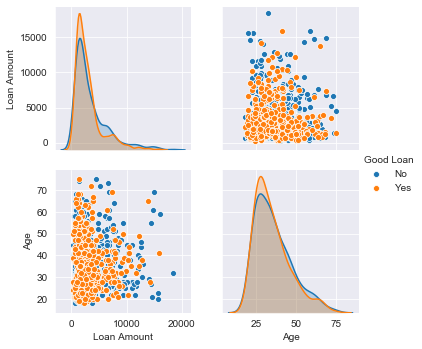

In [107]:
sns.pairplot(df, hue='Good Loan')

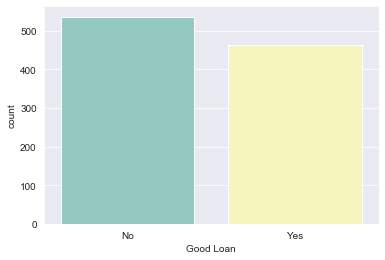

In [108]:
# investigate the distribution of good loan
sns.set_style("darkgrid")
sns.countplot(x='Good Loan', data=df,palette= 'Set3')

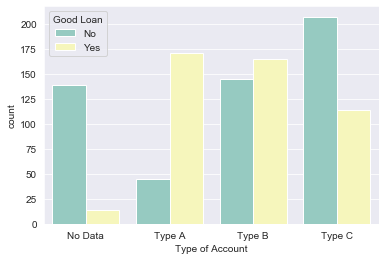

<Figure size 1440x576 with 0 Axes>

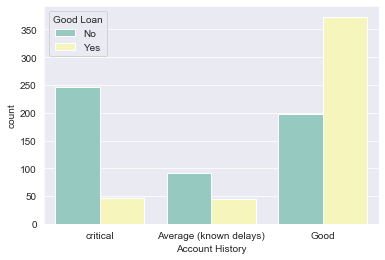

<Figure size 1440x576 with 0 Axes>

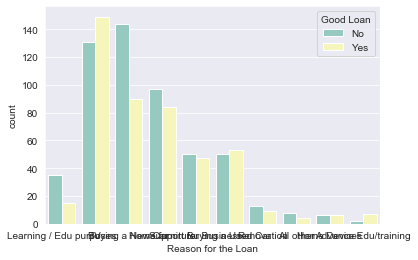

<Figure size 1440x576 with 0 Axes>

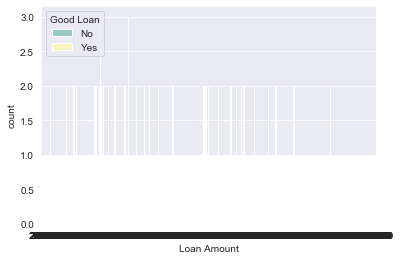

<Figure size 1440x576 with 0 Axes>

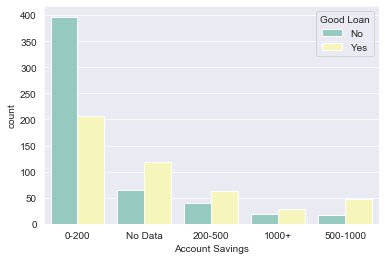

<Figure size 1440x576 with 0 Axes>

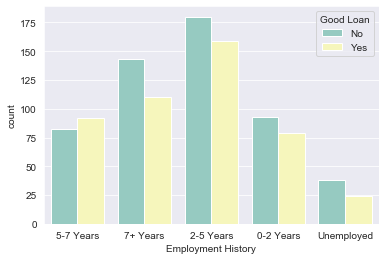

<Figure size 1440x576 with 0 Axes>

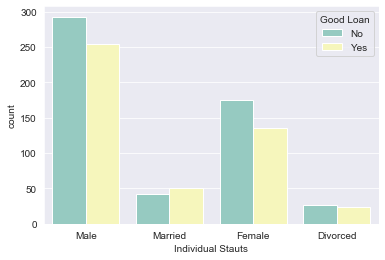

<Figure size 1440x576 with 0 Axes>

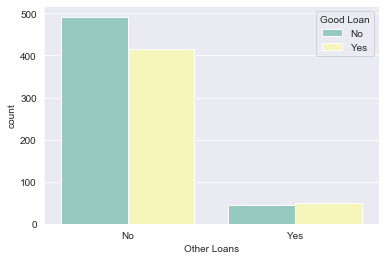

<Figure size 1440x576 with 0 Axes>

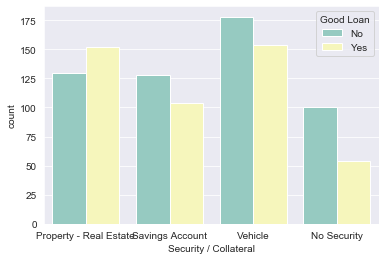

<Figure size 1440x576 with 0 Axes>

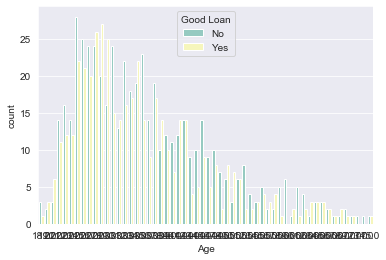

<Figure size 1440x576 with 0 Axes>

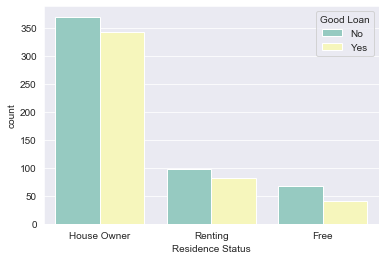

<Figure size 1440x576 with 0 Axes>

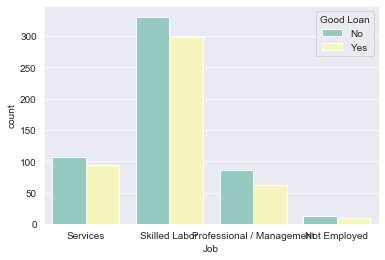

<Figure size 1440x576 with 0 Axes>

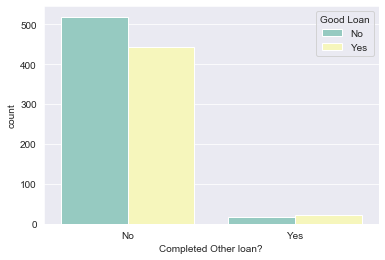

<Figure size 1440x576 with 0 Axes>

In [71]:
# loop through each elements in column to see the relationship
features = ['Type of Account', 'Account History', 'Reason for the Loan',
       'Loan Amount', 'Account Savings', 'Employment History',
       'Individual Stauts', 'Other Loans', 'Security / Collateral', 'Age',
       'Residence Status', 'Job', 'Completed Other loan?']

for f in features:
    plt.figure(figsize=(16,8))
    sns.countplot(x=f, data=df,palette= 'Set3', hue= 'Good Loan')
    plt.show()
    
    

In [118]:
# transform categorical variables into numeric representation
new_df = pd.get_dummies(df,columns=features)

# create 0,1 for y variables
new_df['Good Loan'][new_df['Good Loan']=='Yes'] = 1
new_df['Good Loan'][new_df['Good Loan']=='No'] = 0

/Users/hannahwang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/hannahwang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# 4. Feature selection

In [334]:
# 1. split data into x & y
# 2. run a tree based estimator
# 3. run feature importance

x = new_df.drop('Good Loan', axis=1).values
y = new_df['Good Loan']

y = y.astype(int)

In [146]:
# run decision tree estimators
dt = DecisionTreeClassifier(random_state=15, criterion='entropy', max_depth=10)
dt.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=15,
            splitter='best')

In [175]:
# get feature importance for each feature
fi_name =[]
fi =[]
for i, column in enumerate(new_df.drop('Good Loan',axis=1)):
    fi_name.append(column)
    fi.append(dt.feature_importances_[i])
fi_df = zip(fi_name,fi)    
fi_df = pd.DataFrame(fi_df,columns=['Feature','Feature Importance'])

In [179]:
fi_df = fi_df.sort_values('Feature Importance',ascending=False).reset_index()

# select features we need


0                            Account Savings_0-200
1                             Account History_Good
2                                      Loan Amount
3                                              Age
4                          Type of Account_No Data
5                           Type of Account_Type A
6                           Type of Account_Type C
7                                Job_Skilled Labor
8                                  Other Loans_Yes
9                          Account Savings_No Data
10        Reason for the Loan_Support for Business
11                          Reason for the Loan_TV
12                           Account Savings_1000+
13    Security / Collateral_Property - Real Estate
14            Reason for the Loan_Buying a New Car
15                                    Job_Services
16                    Residence Status_House Owner
17                    Employment History_0-2 Years
18              Reason for the Loan_Home furniture
19                         Acco

In [180]:
fi_df = fi_df['Feature'][:40]

# 5. Splitting data

In [329]:
df_x = new_df[fi_df]
df_y = pd.DataFrame(y)

In [330]:
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,test_size=0.2, random_state=15)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train,test_size=0.1,train_size=0.9,random_state=15)

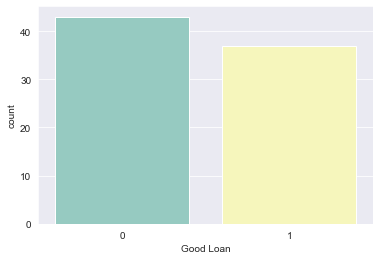

In [208]:
sns.countplot(x=y_valid['Good Loan'],palette='Set3')

# 7. Logistic regression

In [210]:
# train models using train set
log_reg = LogisticRegression(random_state=10,solver='lbfgs')
log_reg.fit(x_train,y_train)

/Users/hannahwang/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=10, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [254]:
# predict y viable using x variable
y_pred = log_reg.predict(x_train)
pred_proba=log_reg.predict_proba(x_train)
# coefficient of features
log_reg.coef_

array([[-1.41441460e+00,  1.89551501e+00, -1.24171739e-04,
         6.60321931e-03, -1.45175925e+00,  9.71756091e-01,
        -1.91489358e-01, -8.90671251e-02,  2.58479572e-01,
         5.29939048e-01,  1.61084241e-01,  5.01415704e-02,
         2.39664486e-01,  4.42354320e-01, -6.90157835e-01,
        -1.17223566e-01,  4.17369907e-02, -4.51682347e-01,
         3.13925411e-01,  1.69194101e-01, -3.79968215e-01,
         3.41166808e-02, -1.70529322e-01,  5.08263153e-01,
        -1.35459348e-01,  1.39613623e-02,  3.92004091e-01,
         4.73274699e-02, -3.69502859e-02,  3.65565896e-01,
         1.27444011e-01, -2.42493258e-01,  1.32442193e-01,
        -2.78851438e-01,  1.01799473e-01, -6.65916818e-02,
        -1.90784757e-03, -2.59928582e-01,  1.12388828e-01,
        -1.14837770e-01]])

# 8. Evaluate model

In [228]:
# accuracy for train set
log_reg.score(x_train,y_train)
# accuracy for test set
log_reg.score(x_test,y_test)
# the accuracy for test set is slightly lower

# classification report
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       387
           1       0.77      0.75      0.76       333

   micro avg       0.78      0.78      0.78       720
   macro avg       0.78      0.78      0.78       720
weighted avg       0.78      0.78      0.78       720



In [233]:
# confusion matrix
cm = confusion_matrix(y_train,y_pred)
cm_norm = cm/cm.sum(axis=1).reshape(-1,1)

In [241]:
# plot confusion matrix
def plot_cm(cm, classes=None, title='Confusion matrix'):
    if classes is not None:
        sns.heatmap(cm,xticklabels=classes,yticklabels=classes,vmin=0.,vmax=1.,
        annot=True,annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0.,vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

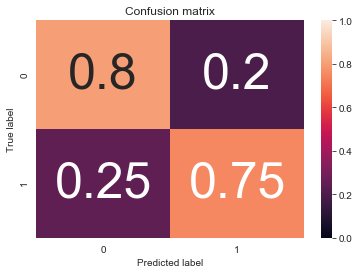

In [242]:
plot_cm(cm_norm,classes=log_reg.classes_,title='Confusion matrix')

In [248]:
FP = cm.sum(axis=0)-np.diag(cm)
FN = cm.sum(axis=1)-np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP+FN+TP)

In [251]:
# true positive rate, recall, hit rate,sensitivity
TPR = TP/(TP+FN)
# positive preditive value, precision
PPV = TP / (TP+FP)
# false positive rate, false alarm rate
FPR = FP / (FP+TN)
# false negative rate, miss rate
FNR = FN / (FN+TP)
# classification error


In [258]:
# running log loss on training
log_loss(y_train,pred_proba)
# running log loss on testing
pred_proba_t = log_reg.predict_proba(x_test)
log_loss(y_test,pred_proba_t)

0.49358753587590326

# 9. Hyper parameter tuning

In [259]:
# inverse of regularization strength helps to avoid overfitting. 
# It penalizes large value of parameters
# find global minimum

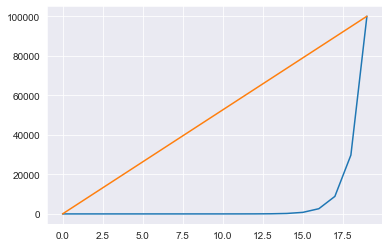

In [265]:
np.geomspace(1e-5,1e5,num=20)
plt.plot(np.geomspace(1e-5,1e5,num=20)) #uniformlly distributed geospace
plt.plot(np.linspace(1e-5,1e5,num=20)) #uniformally distributed line space

In [276]:
# loop through parameters
c_list = np.geomspace(1e-5,1e5,num=20)
ca=[]
logorithmic_loss=[]
for c in c_list:
    log_reg2 = LogisticRegression(random_state=10,solver='lbfgs',C=c)
    log_reg2.fit(x_train,y_train)
    score=log_reg2.score(x_test,y_test)
    ca.append(score)
    pred_proba_t = log_reg2.predict_proba(x_test)
    log_loss2 = log_loss(y_test,pred_proba_t)
    logorithmic_loss.append(log_loss2)


/Users/hannahwang/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hannahwang/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hannahwang/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hannahwang/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expec

In [281]:
# reshape and table

ca2=np.array(ca).reshape(20,)
logorithmic_loss2=np.array(logorithmic_loss).reshape(20,)

outcomes = zip(c_list,ca2,logorithmic_loss2)

In [282]:
df_outcomes = pd.DataFrame(outcomes,columns=['c_list','ca2','logorithmic_loss2'])

In [284]:
df_outcomes.sort_values('logorithmic_loss2',ascending=True).reset_index()

,index,c_list,ca2,logorithmic_loss2
0,15,784.759970,0.775,0.487493
1,12,20.691381,0.775,0.487525
2,19,100000.000000,0.760,0.491617
3,13,69.519280,0.770,0.492777
4,16,2636.650899,0.770,0.493193
5,18,29763.514416,0.770,0.493202
6,17,8858.667904,0.770,0.493227
7,9,0.545559,0.745,0.493521
8,10,1.832981,0.750,0.493551
9,11,6.158482,0.765,0.493990


In [301]:
# another way of choosing c value
# cross-validation to find optimal c

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold

In [304]:
kf = KFold(n_splits=3,random_state=0,shuffle=True)
# list of c
c_list = np.logspace(np.log10(1e-5),np.log10(1e5),num=20)
# logistic reg cv
log_reg3 = LogisticRegressionCV(cv=kf,random_state=15,Cs=c_list)
log_reg3.fit(x_train,y_train)
print(log_reg3.score(x_test,y_test))

/Users/hannahwang/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.765


/Users/hannahwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [303]:
pred_proba_t = log_reg3.predict_proba(x_test)
log_loss3=log_loss(y_test,pred_proba_t)
print(log_loss3)

0.49277218357645397


In [298]:
print(log_reg3.C_)

[0.54555948]


/Users/hannahwang/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


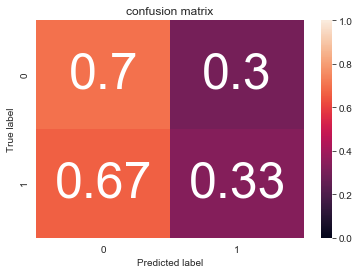

/Users/hannahwang/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


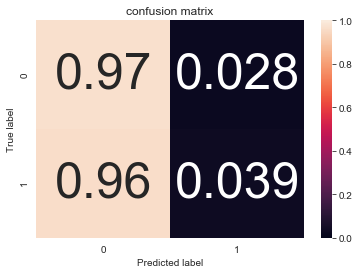

/Users/hannahwang/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


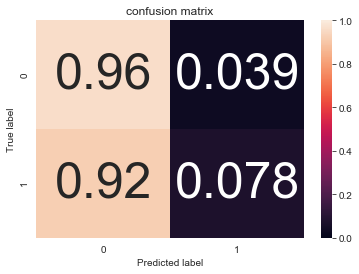

/Users/hannahwang/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


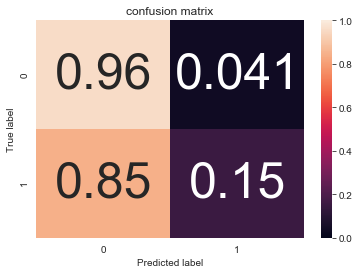

/Users/hannahwang/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


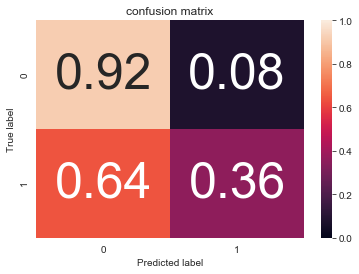

/Users/hannahwang/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


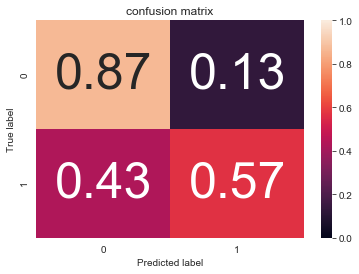

/Users/hannahwang/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


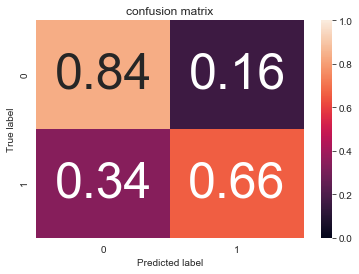

/Users/hannahwang/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


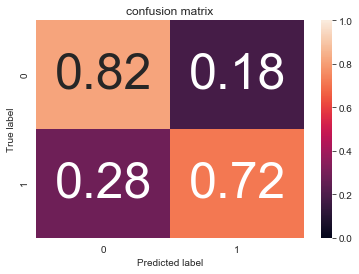

/Users/hannahwang/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


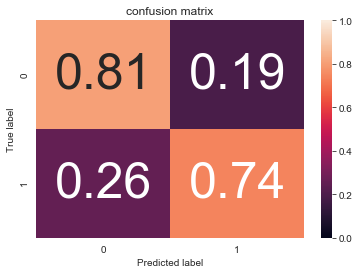

/Users/hannahwang/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


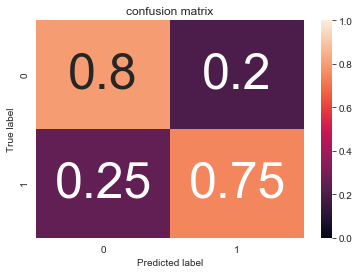

/Users/hannahwang/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


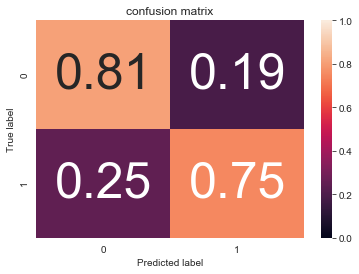

/Users/hannahwang/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hannahwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


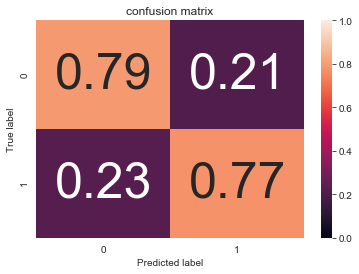

/Users/hannahwang/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hannahwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


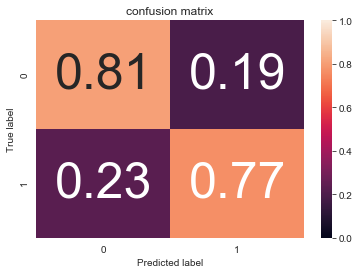

/Users/hannahwang/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hannahwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


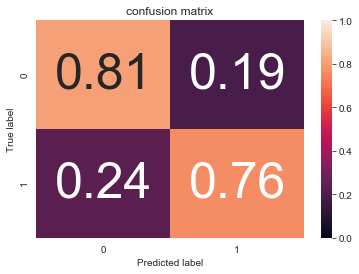

/Users/hannahwang/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


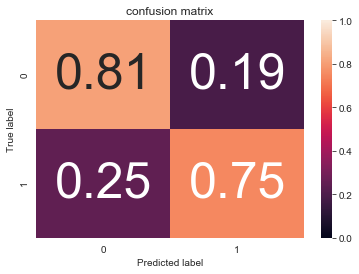

/Users/hannahwang/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hannahwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


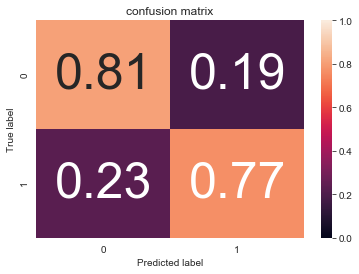

/Users/hannahwang/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


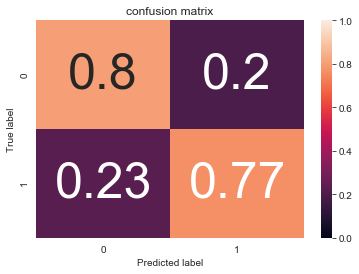

/Users/hannahwang/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hannahwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


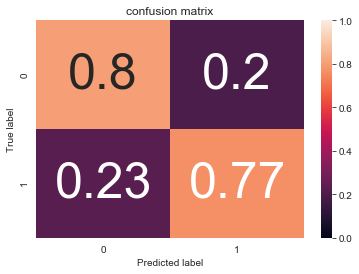

/Users/hannahwang/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


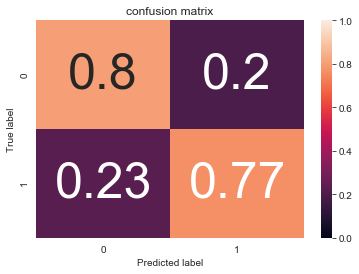

/Users/hannahwang/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hannahwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


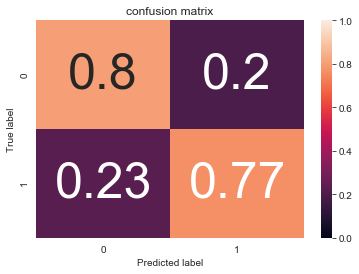

In [308]:
# loop through parameters
c_list = np.geomspace(1e-5,1e5,num=20)
ca=[]
logorithmic_loss=[]
for c in c_list:
    log_reg2 = LogisticRegression(random_state=10,solver='lbfgs',C=c)
    log_reg2.fit(x_train,y_train)
    score=log_reg2.score(x_test,y_test)
    ca.append(score)
    
    pred_proba_t = log_reg2.predict_proba(x_test)
    log_loss2 = log_loss(y_test,pred_proba_t)
    logorithmic_loss.append(log_loss2)
    
    y_pred = log_reg2.predict(x_train)
    cm = confusion_matrix(y_train,y_pred)
    cm_norm = cm/cm.sum(axis=1).reshape(-1,1)
    plot_cm(cm_norm,classes=log_reg.classes_,title='confusion matrix')
    plt.show()

In [324]:
# Training a Dummy Classifier

from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(x_train, y_train)
score = dummy_clf.score(x_test, y_test)

pred_proba_t = dummy_clf.predict_proba(x_test)
log_loss2 = log_loss(y_test, pred_proba_t)

print("Testing Acc:", score)
print("Log Loss:", log_loss2)


Testing Acc: 0.53
Log Loss: 16.233224905608022


# 10. Final model using selected C

In [333]:
log_reg_f = LogisticRegression(random_state=10,solver='lbfgs',C=784.759970)
log_reg_f.fit(x_train,y_train)
score=log_reg_f.score(x_valid,y_valid)

pred_proba_t = log_reg_f.predict_proba(x_valid)
log_loss2 = log_loss(y_valid,pred_proba_t)

print('score',score)
print(log_loss2)

score 0.7625
0.4332865310443381


/Users/hannahwang/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hannahwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


/Users/hannahwang/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hannahwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=784.75997, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=10,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)